In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from datetime import datetime


In [4]:
import pandas_datareader.data as web
 

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
#To get one year from current date
start = datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] =  web.DataReader(stock,'yahoo',start,end)

In [9]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-22,204.940002,202.339996,202.830002,204.529999,19439500.0,201.887497
2019-04-23,207.750000,203.899994,204.429993,207.479996,23323000.0,204.799362
2019-04-24,208.479996,207.050003,207.360001,207.160004,17540600.0,204.483505
2019-04-25,207.759995,205.119995,206.830002,205.279999,18543200.0,202.627808
2019-04-26,205.000000,202.119995,204.899994,204.300003,18649100.0,201.660461


In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,245.075708,239.604252,242.036456,242.563700,3.325141e+07,241.510443
std,43.223838,41.955949,42.477706,42.823814,1.733137e+07,43.371263
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,206.455002,203.365005,204.317493,204.549999,2.167490e+07,202.629662
50%,237.889999,234.294998,235.724998,236.040001,2.782950e+07,234.776268
75%,278.330002,269.152496,273.072487,274.742493,3.804492e+07,274.253899
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-04-22 to 2020-04-22
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


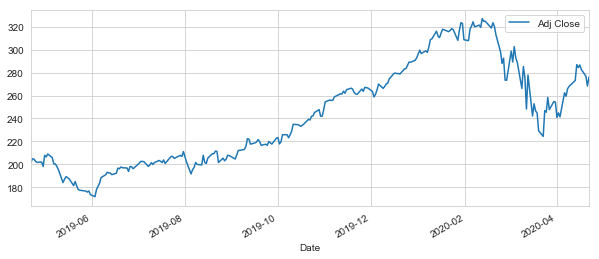

In [12]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

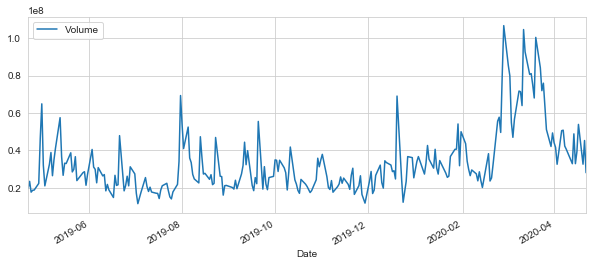

In [13]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [20]:
#moving average for 10 ,20 and 50 days
ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

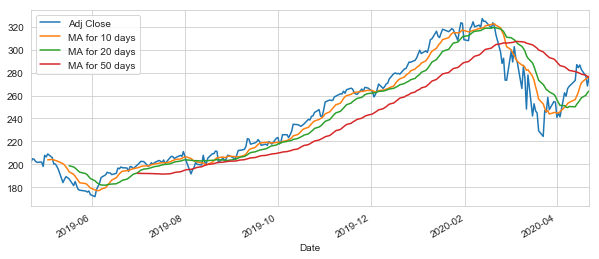

In [21]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))


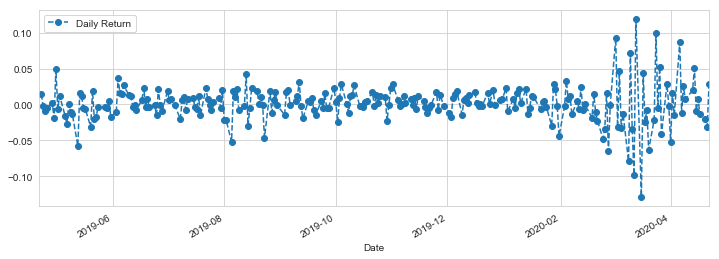

In [22]:
#percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

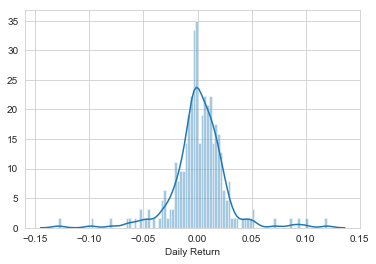

In [23]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

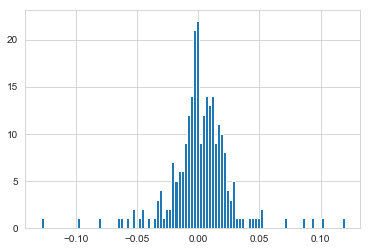

In [26]:
#alternative way
AAPL['Daily Return'].hist(bins=100)

In [28]:
closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']


In [29]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-22,201.887497,1887.310059,1248.839966,122.143959
2019-04-23,204.799362,1923.770020,1264.550049,123.802032
2019-04-24,204.483505,1901.750000,1256.000000,123.377647
2019-04-25,202.627808,1902.250000,1263.449951,127.463577
2019-04-26,201.660461,1950.630005,1272.180054,128.193909


In [30]:
tech_rets = closing_df.pct_change()

In [31]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-22,NaN,NaN,NaN,NaN
2019-04-23,0.014423,0.019318,0.012580,0.013575
2019-04-24,-0.001542,-0.011446,-0.006761,-0.003428
2019-04-25,-0.009075,0.000263,0.005931,0.033117
2019-04-26,-0.004774,0.025433,0.006910,0.005730


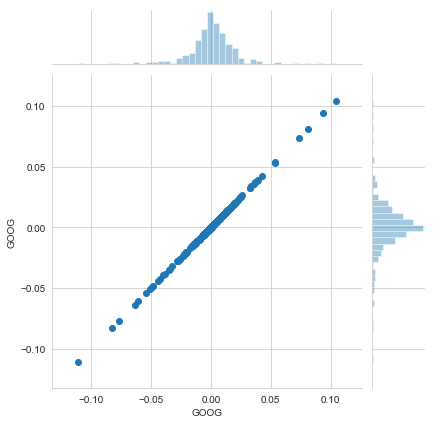

In [33]:
#Comparing the daily percentage return of two stocks for checking
correlation 
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter')

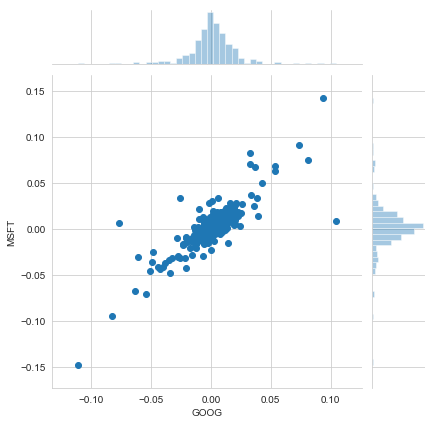

In [34]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [35]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-22,NaN,NaN,NaN,NaN
2019-04-23,0.014423,0.019318,0.012580,0.013575
2019-04-24,-0.001542,-0.011446,-0.006761,-0.003428
2019-04-25,-0.009075,0.000263,0.005931,0.033117
2019-04-26,-0.004774,0.025433,0.006910,0.005730


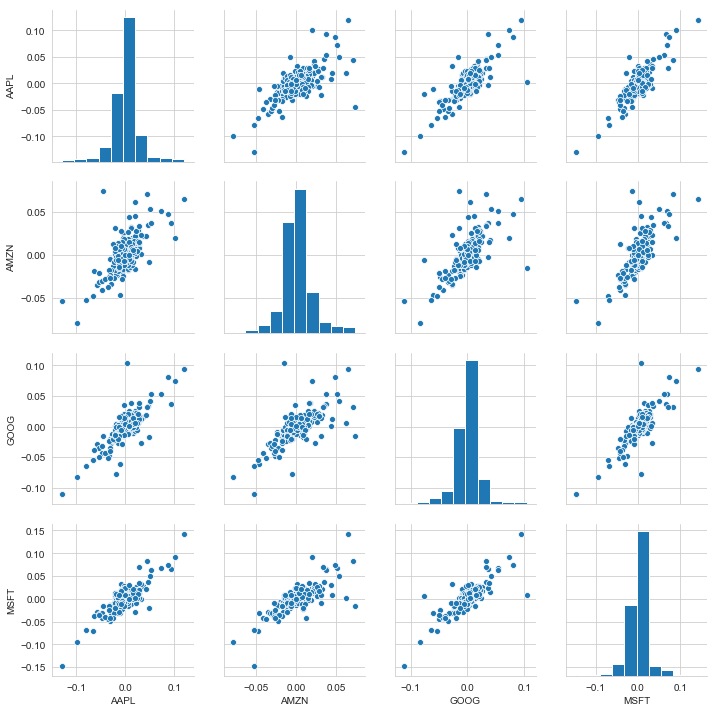

In [36]:
sns.pairplot(tech_rets.dropna())

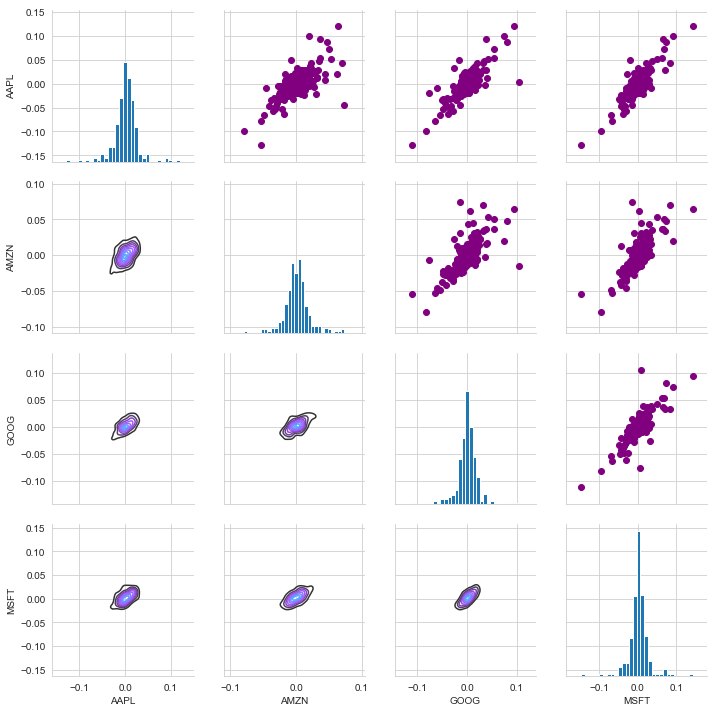

In [41]:
return_fig =sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

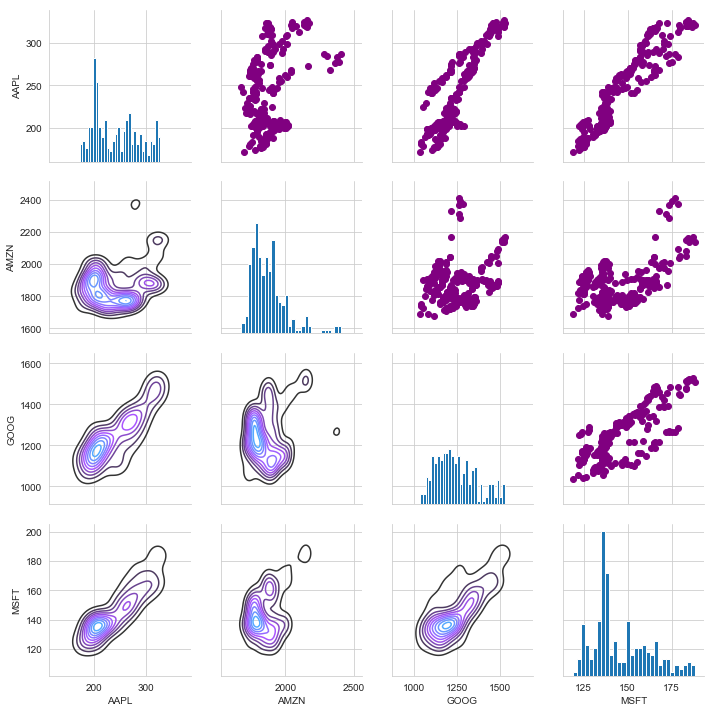

In [43]:
return_fig =sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

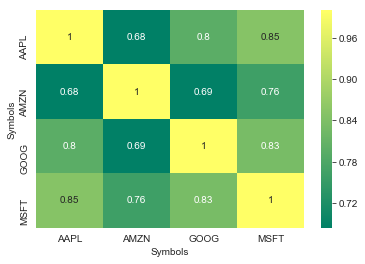

In [60]:
sns.heatmap(tech_rets.dropna().corr(), annot=True, cmap='summer')

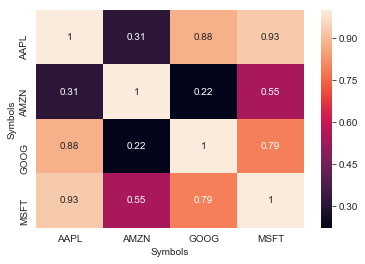

In [62]:
sns.heatmap(closing_df.corr(), annot=True)

In [63]:
rets = tech_rets.dropna()

In [64]:
area = np.pi*20

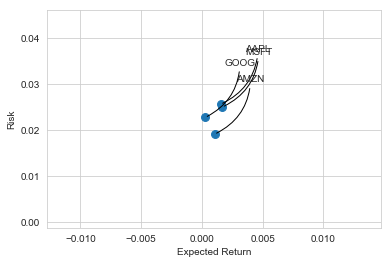

In [76]:
plt.scatter(rets.mean(),rets.std(),s= area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext =(50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', color= 'black' ,connectionstyle ='arc3,rad=-0.3'))
    

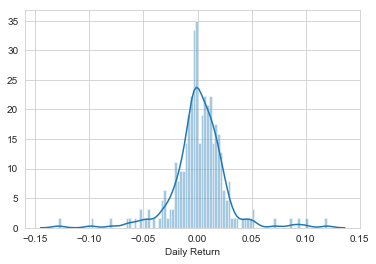

In [77]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [78]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-23,0.014423,0.019318,0.012580,0.013575
2019-04-24,-0.001542,-0.011446,-0.006761,-0.003428
2019-04-25,-0.009075,0.000263,0.005931,0.033117
2019-04-26,-0.004774,0.025433,0.006910,0.005730
2019-04-29,0.001517,-0.006254,0.012105,-0.000924


In [79]:
rets['AAPL'].quantile(0.05)

-0.034215511527353734

In [80]:
#Value at Risk using the Monte Carlo method
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [100]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

In [101]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-22,1249.089966,1228.310059,1235.989990,1248.839966,807300,1248.839966
2019-04-23,1269.000000,1246.380005,1250.689941,1264.550049,1319900,1264.550049
2019-04-24,1268.010010,1255.000000,1264.119995,1256.000000,1018800,1256.000000
2019-04-25,1267.407959,1252.030029,1264.770020,1263.449951,1107300,1263.449951
2019-04-26,1273.069946,1260.319946,1269.000000,1272.180054,1241400,1272.180054


Text(0.5,1,'Monte Carlo Analysis for Google')

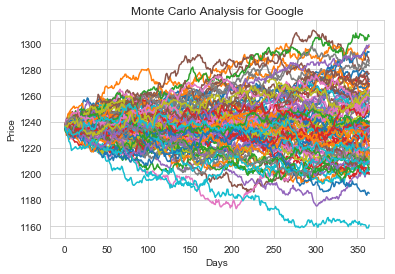

In [102]:
start_price = 1235.989990

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [103]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in xrange(runs): 
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

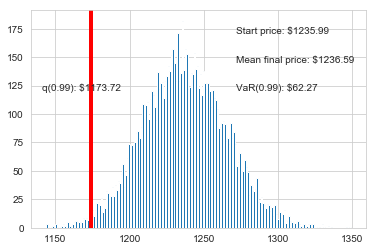

In [104]:
q = np.percentile(simulations, 1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')